<a href="https://colab.research.google.com/github/pranilbasu/ML-Projects/blob/main/ML_Project_Prediction_of_Price_of_Airline_Tickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of Price of Airline Tickets

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset
train_data = pd.read_excel(r'Data_train.xlsx')

In [ ]:
train_data.head(7)  #preview of data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087


In [ ]:
train_data.info()  #information about training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Dealing with missing value (if any)
train_data.isnull().sum() #view number of missing data in each category

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data[train_data['Route'].isnull()]  # row with missing data in the 'Route' category

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
train_data.dropna(inplace=True)  # Since out of 10683 indices in out data we have only 1 with missing data, we can remove it

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
data = train_data.copy()

In [ ]:
# function to convert object to timestamp
def change_to_datetime(col):          
   data[col] = pd.to_datetime(data[col])

In [ ]:
# object values of the following columns  are to be converted into timestamp
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(feature)

D:\Applications\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Applications\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Applications\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Applications\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_

In [ ]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [ ]:
data['Journey_date'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year     # three new features for date, month and year of journey

In [ ]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-24 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-24 05:50:00,2022-08-24 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-24 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-08-24 18:05:00,2022-08-24 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019


In [ ]:
data.drop('Date_of_Journey', axis = 1, inplace = True)  # Date_of_Journey feature is to be removed

In [ ]:
# function to extract hour and minute 
def extract_hour_min(df, col):
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minute'] = df[col].dt.minute
    df.drop(col, axis = 1, inplace =True)
    return df.head(2)

In [ ]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-24 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [ ]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


### Analysis of timing of Flight take-off

In [ ]:
# function for cartegorizing fight take-off timings
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Afternoon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

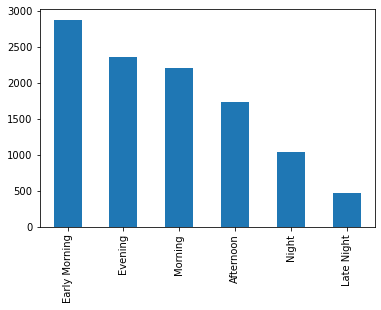

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

### Preprocessing 'Duration' Feature

In [ ]:
# function for preprocessing Duration
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [ ]:
data['Duration'].apply(preprocess_duration) 

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [ ]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [ ]:
data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1])) #converting duration features (hours) into integers

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [ ]:
data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1])) #converting duration features (minutes) into integers

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

In [ ]:
data['Duration_hour'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
data['Duration_minute'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1])) #creating two new indices for the integers

In [ ]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25


### Analysis of Impact of Duration on Price

In [ ]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval) #convert hour and minute into total minutes

In [ ]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_Month,Journey_Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140


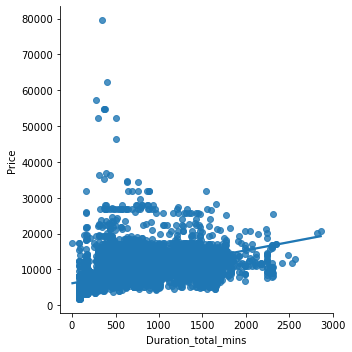

In [ ]:
sns.lmplot(x = 'Duration_total_mins', y = 'Price', data = data) #plot to show relation between duration and fare price

<AxesSubplot:>

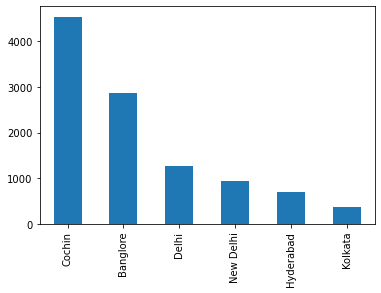

In [ ]:
data['Destination'].value_counts().plot(kind = 'bar')  #cities with number of flights

#### Routes used by Jet Airways

In [ ]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending= False)  #only those routes taken by Jet Airways and in ascending order of the number of times used

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### Airline vs. Pricie analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

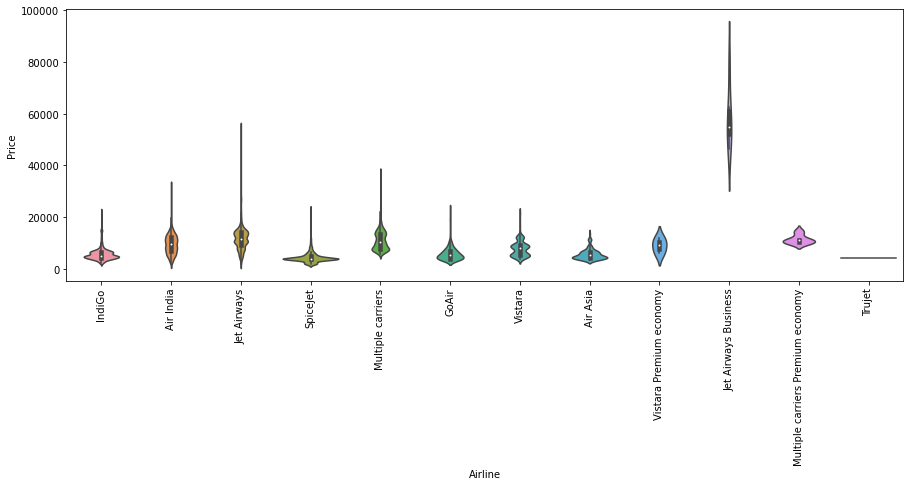

In [ ]:
plt.figure(figsize = (15,5))
sns.violinplot(y = 'Price', x = 'Airline', data = data)
plt.xticks(rotation = 'vertical')

### Encoding Categorical Data 

In [ ]:
data.drop(columns = ['Additional_Info', 'Route', 'Duration_total_mins', 'Journey_Year'], axis = 1, inplace = True)  # columns that add no value to the model are to be removed 

In [ ]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0


In [ ]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)  #Encoding Source category

In [ ]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


### Target Guided Mean Encoding

In [ ]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index  #sorting Airlines in terms of Mean Price 

In [ ]:
dict_1={key:index for index,key in enumerate(airlines,0)}  #Feature encoding of Airlines Category

In [ ]:
data['Airline']=data['Airline'].map(dict_1)  #maping dictionary over Airlines

In [ ]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)  # Since New Delhi and Delhi are the same city

In [ ]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index  #sorting Destination in terms of Mean Price 

In [ ]:
dict_2={key:index for index,key in enumerate(dest,0)}  #feature encoding of Destination

In [ ]:
data['Destination']=data['Destination'].map(dict_2) # Mapping dictinary over Destination

In [ ]:
dict_3 = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4} #encodiing number of stops (manually)

In [ ]:
data['Total_Stops'] = data['Total_Stops'].map(dict_3)  # Mapping dictinary over Total Stops

In [ ]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


### Dealing with Outliers

D:\Applications\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

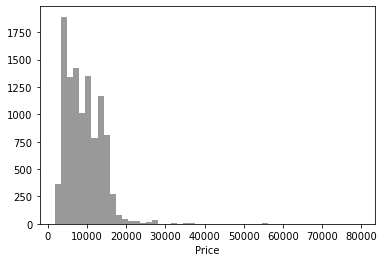

In [ ]:
sns.distplot(data['Price'], kde = False, color = 'black')

In [ ]:
data['Price']=np.where(data['Price']>=30000, data['Price'].median(), data['Price'])  #the high outliers are replaced with the median value

<AxesSubplot:xlabel='Price'>

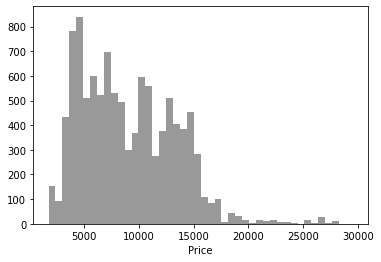

In [ ]:
sns.distplot(data['Price'], kde = False, color = 'black')

In [ ]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)  #removing features that are not useful, because these are already encoded

In [ ]:
data.head(4)   #no strings are present 

,Airline,Destination,Total_Stops,Price,Journey_date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0


### Selecting the appropriate features

In [ ]:
from sklearn.feature_selection import mutual_info_regression 

In [ ]:
X = data.drop(['Price'], axis = 1)  #dropping dependent variable Price

In [ ]:
Y = data['Price']   #Dependent variable

In [ ]:
X.head(4)

,Airline,Destination,Total_Stops,Journey_date,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,1,0,0,0


In [ ]:
Y.head(4)

0     3897.0
1     7662.0
2    13882.0
3     6218.0
Name: Price, dtype: float64

In [ ]:
mutual_info_regression(X,Y)   #Mutual regression scores

array([0.98035094, 1.0039931 , 0.78882787, 0.1920663 , 0.24228929,
       0.33697181, 0.25593769, 0.40403096, 0.35412393, 0.46764797,
       0.34087443, 0.38099122, 0.45404404, 0.51778398, 0.13696821,
       0.20483114])

In [ ]:
imp=pd.DataFrame(mutual_info_regression(X,Y),index=X.columns)
imp.columns=['Importance']

In [ ]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Destination,1.002130
Airline,0.977006
Total_Stops,0.796433
Source_Delhi,0.527051
Source_Kolkata,0.463676
Duration_hour,0.457857
Arrival_Time_hour,0.400773
Source_Banglore,0.387160
Arrival_Time_minute,0.349367
Duration_minute,0.339985


### Building the ML Model 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) #splitting the dataset into training set and test set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
model = Rf.fit(X_train, Y_train)           #Application of Random forest regressor to our dataset

In [ ]:
Y_pred = Rf.predict(X_test)
print(Y_pred)

[16775.67        6261.13        8888.34       ...  6671.12
 12677.73333333 13096.91733333]


In [ ]:
Rf.predict([[7,4,2,5,9,5,25,13,30,19,25,0,1,0,0,0]])  #Prediction of a new result

D:\Applications\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([11667.83])

### Testing the model

In [ ]:
from sklearn import metrics
metrics.r2_score(Y_test, Y_pred)

0.8118284441855398